In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.shape

(145460, 23)

In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

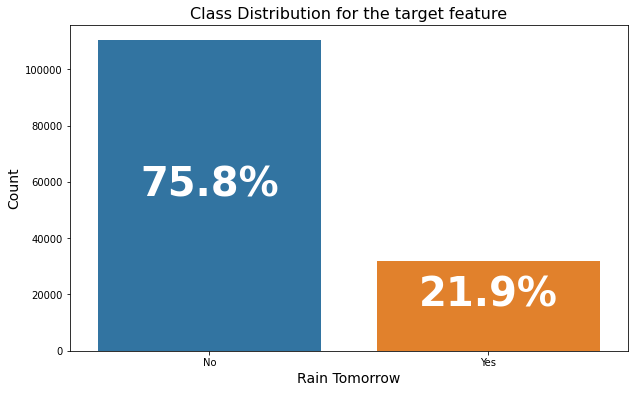

In [37]:
# Checking for the class imbalance
fig = plt.figure(figsize = (10, 6))
axis = sns.countplot(x = 'RainTomorrow', data = df);
axis.set_title('Class Distribution for the target feature', size = 16);

for patch in axis.patches:
    axis.text(x = patch.get_x() + patch.get_width()/2, y = patch.get_height()/2, 
            s = f"{np.round(patch.get_height()/len(df)*100, 1)}%", 
            ha = 'center', size = 40, rotation = 0, weight = 'bold' ,color = 'white')
    
axis.set_xlabel('Rain Tomorrow', size = 14)
axis.set_ylabel('Count', size = 14);



The class is imbalance when the minority class has only 5-10% data. We have 21.9% data belonging to the minority class, so, there is no class imbalance. Now, let's look at other features.

In [6]:
#check missing values

null_values=df.isnull().sum()/len(df)
for i in range(len(null_values.index)):
    print("Column",null_values.index[i],"has ",null_values[i]*100,"% null values\n")


Column Date has  0.0 % null values

Column Location has  0.0 % null values

Column MinTemp has  1.0208992162793895 % null values

Column MaxTemp has  0.8669049910628353 % null values

Column Rainfall has  2.2418534304963567 % null values

Column Evaporation has  43.166506256015396 % null values

Column Sunshine has  48.00976213391998 % null values

Column WindGustDir has  7.098858792795271 % null values

Column WindGustSpeed has  7.055547916953114 % null values

Column WindDir9am has  7.263852605527293 % null values

Column WindDir3pm has  2.906641000962464 % null values

Column WindSpeed9am has  1.214766946239516 % null values

Column WindSpeed3pm has  2.105046060772721 % null values

Column Humidity9am has  1.8245565791282825 % null values

Column Humidity3pm has  3.09844630826344 % null values

Column Pressure9am has  10.356799120033 % null values

Column Pressure3pm has  10.331362573903478 % null values

Column Cloud9am has  38.42155919153032 % null values

Column Cloud3pm has  40.

<AxesSubplot:>

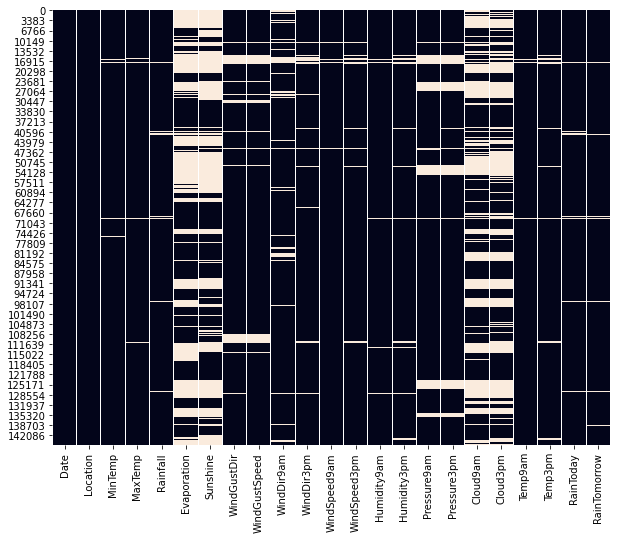

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),cbar=False)

In [8]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [9]:
# drop cols with >35% missing value
# 'Evaporation','Cloud9am','Cloud3pm','Sunshine' has >35% of missing value ..

df1=df.drop(['Evaporation','Cloud9am','Cloud3pm','Sunshine'],axis=1)
df1

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


Feature engineering

Add two new feature data and month from date

In [38]:

df1['year']=pd.DatetimeIndex(df1['Date']).year
df1['month']=pd.DatetimeIndex(df1['Date']).month


<AxesSubplot:title={'center':'How much rain get in a year'}, xlabel='year', ylabel='count'>

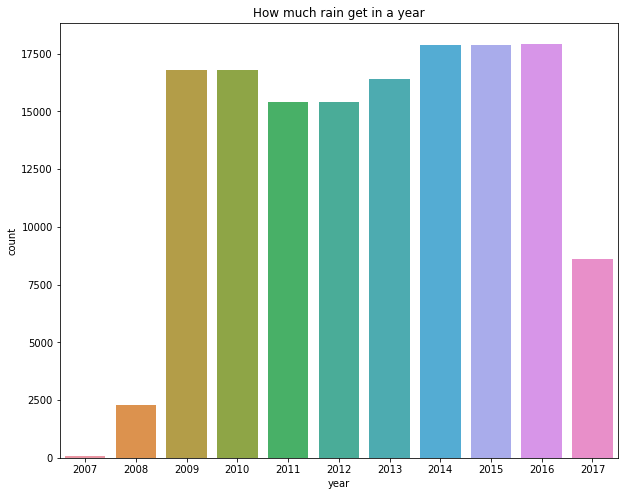

In [11]:
plt.figure(figsize=(10,8))
plt.title('How much rain get in a year')
sns.countplot(x='year',data=df1)

<AxesSubplot:title={'center':'Rain vs month'}, xlabel='month', ylabel='count'>

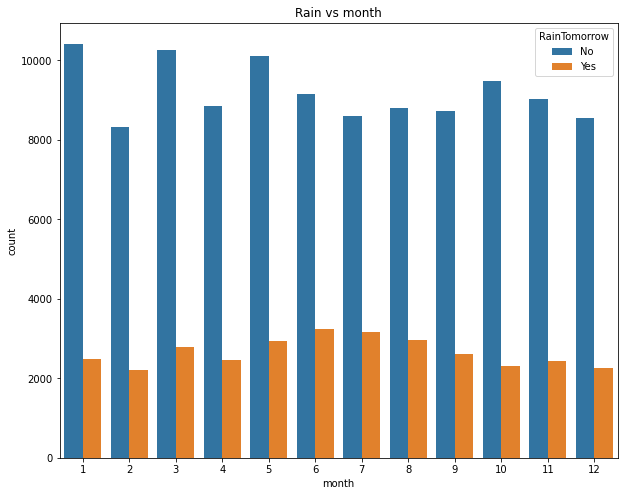

In [12]:
plt.figure(figsize=(10,8))
plt.title('Rain vs month')
sns.countplot(x='month',data=df1,hue='RainTomorrow')

#### preprocessing

In [13]:
df1.fillna(df.mean(),inplace=True)
df1.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
year                 0
month                0
dtype: int64

In [14]:
#remove missing values of objects
df1.dropna(inplace=True)

<AxesSubplot:>

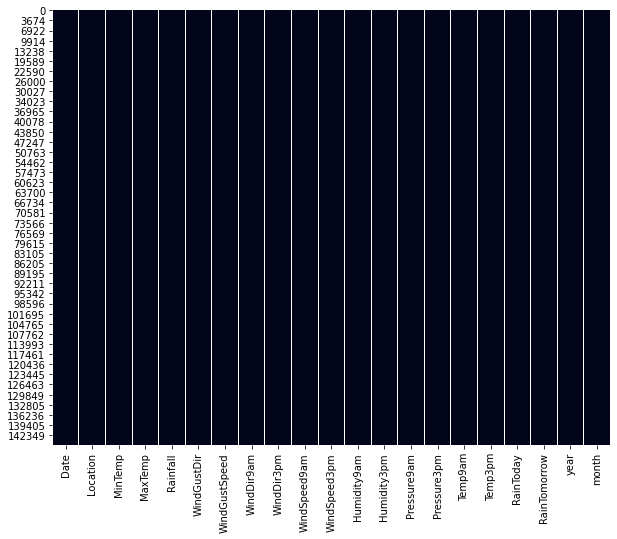

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.isnull(),cbar=False)

In [16]:
df1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,2008,12
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,2008,12
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,2008,12
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,2008,12
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,2008,12


In [17]:
## convert text format into numb..label encoding
df1['RainToday'].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
## check object cols ..

obj_df = pd.DataFrame(df1.select_dtypes(include=['object']).copy())
obj_df.head()

#we need to convert only needed cols...consider without date location

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [19]:
obj_df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', 'SSW', 'N', 'WSW',
       'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

convert a column to a category, then use those category values for your label encoding

need to convert two cols 

### labelencoding


In [20]:

obj_df["RainToday"] = obj_df["RainToday"].astype('category')
obj_df["RainTomorrow"] = obj_df["RainTomorrow"].astype('category')

obj_df["WindGustDir"] = obj_df["WindGustDir"].astype('category')
obj_df["WindDir9am"] = obj_df["WindDir9am"].astype('category')
obj_df["WindDir3pm"] = obj_df["WindDir3pm"].astype('category')

obj_df.dtypes


Date              object
Location          object
WindGustDir     category
WindDir9am      category
WindDir3pm      category
RainToday       category
RainTomorrow    category
dtype: object

In [21]:
#assign the encoded variable to a new column using the 
# cat.codes accessor

obj_df["Rain_today"] = obj_df["RainToday"].cat.codes
obj_df["Rain_tomorrow"] = obj_df["RainTomorrow"].cat.codes

obj_df["windir"] = obj_df["WindGustDir"].cat.codes
obj_df["windir9am"] = obj_df["WindDir9am"].cat.codes
obj_df["windir3pm"] = obj_df["WindDir3pm"].cat.codes

wdata=pd.concat([df1,obj_df['Rain_today'],obj_df['Rain_tomorrow'],obj_df['windir'],obj_df['windir9am'],obj_df['windir3pm']],axis=1)
wdata=wdata.drop(['RainToday','RainTomorrow','WindGustDir','WindDir9am','WindDir3pm'],axis=1)
wdata.head()  

# # 0-No 1-Yes

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Temp9am,Temp3pm,year,month,Rain_today,Rain_tomorrow,windir,windir9am,windir3pm
0,2008-12-01,Albury,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,...,1007.1,16.9,21.8,2008,12,0,0,13,13,14
1,2008-12-02,Albury,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,...,1007.8,17.2,24.3,2008,12,0,0,14,6,15
2,2008-12-03,Albury,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,...,1008.7,21.0,23.2,2008,12,0,0,15,13,15
3,2008-12-04,Albury,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,...,1012.8,18.1,26.5,2008,12,0,0,4,9,0
4,2008-12-05,Albury,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,...,1006.0,17.8,29.7,2008,12,0,0,13,1,7


<AxesSubplot:>

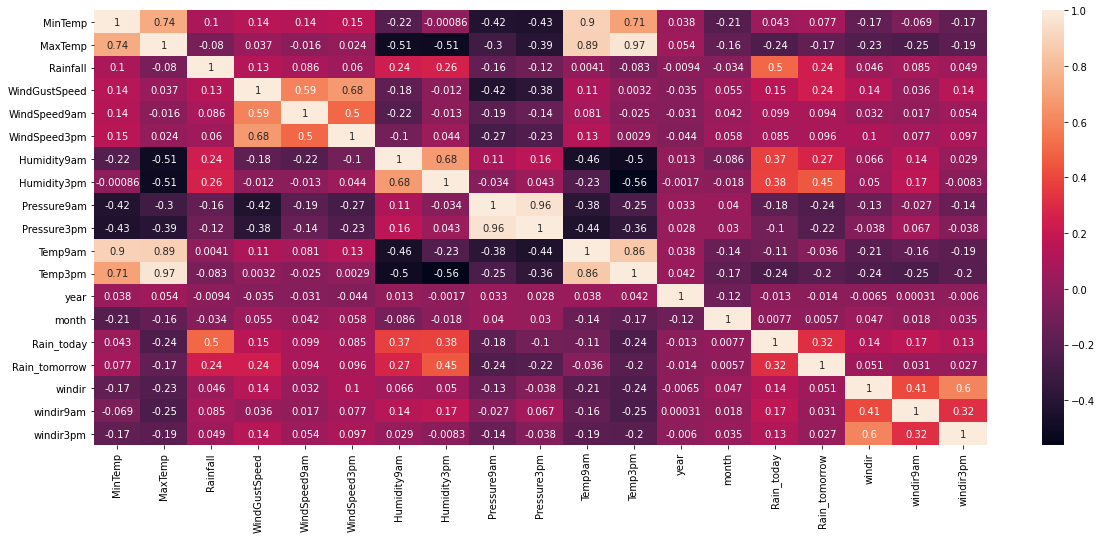

In [22]:
plt.figure(figsize=(20,8))
sns.heatmap(wdata.corr(),annot=True)

In [23]:
# remove highly correlated cols
## select features 

# wdata.columns

In [82]:
#objective: we need to predict raintommorrow
#split 
data=wdata.drop(['Date','Location'],axis=1)
data.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,year,month,Rain_today,Rain_tomorrow,windir,windir9am,windir3pm
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,2008,12,0,0,13,13,14
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,2008,12,0,0,14,6,15
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,2008,12,0,0,15,13,15
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,2008,12,0,0,4,9,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,2008,12,0,0,13,1,7


In [83]:
x=data.drop(['year','month','Rain_tomorrow'],axis=1)
y=data['Rain_tomorrow']

#### standardization

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler=StandardScaler()
scaler.fit(x)
scaled_data=scaler.transform(x)

print(scaled_data.shape)
print()
print(scaled_data)

(123710, 16)

[[ 0.15487974 -0.07976939 -0.20821527 ...  1.13029811  1.25919565
   1.3482223 ]
 [-0.78751395  0.22553732 -0.2785717  ...  1.34466371 -0.27888977
   1.5647552 ]
 [ 0.07634694  0.30880279 -0.2785717  ...  1.55902931  1.25919565
   1.5647552 ]
 ...
 [-1.38436329  0.25329248 -0.2785717  ... -0.37026108  0.3802897
  -1.03363961]
 [-1.10164518  0.47533372 -0.2785717  ... -1.01335788  0.3802897
   1.3482223 ]
 [-0.7246877   0.4892113  -0.2785717  ...  0.27283572  0.60001619
  -1.03363961]]


In [93]:
pca=PCA()
reduced_x=pca.fit_transform(scaled_data)

print(reduced_x.shape)
print()
print(reduced_x)

(123710, 16)

[[ 0.66119936  1.71577636 -1.57109859 ...  0.30082333  0.04112921
  -0.05887651]
 [ 0.83955839  0.38077341 -1.80504589 ...  0.04595089  0.05778131
   0.10309144]
 [ 1.45110146  1.71103171 -2.29091311 ...  0.2308783  -0.19248941
   0.00335272]
 ...
 [-0.65306925 -2.62444297 -0.70316921 ... -0.26659499 -0.08268629
  -0.03198563]
 [-0.13944309 -1.70022527 -1.1612572  ... -0.35920498 -0.03075237
   0.04269351]
 [ 0.25973064 -1.97935087 -0.60284241 ... -0.11839994 -0.13556784
   0.02323021]]


In [ ]:
#PCA create new matrix dataset ...

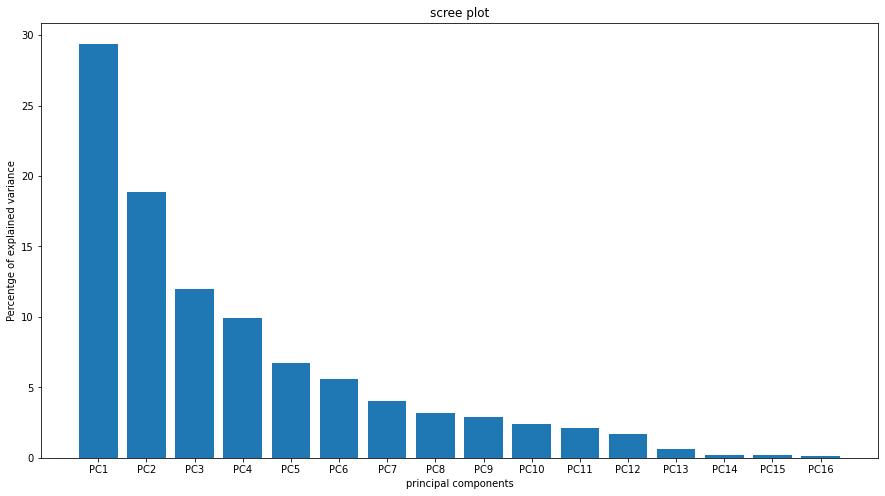

In [94]:
#scree plot

per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)

labels=['PC'+str(x) for x in range(1,len(per_var)+1)]
plt.figure(figsize=(15,8))
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)

plt.ylabel('Percentge of explained variance')
plt.xlabel('principal components')
plt.title('scree plot')
plt.show()

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

xtrain,xtest,ytrain,ytest=train_test_split(reduced_x,y,test_size=0.2,random_state=40,stratify = y)

log=LogisticRegression()
log.fit(xtrain,ytrain)
ypred=log.predict(xtest)

In [71]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
rf_pred=rf.predict(xtest)

In [72]:
def model_report(ytest,ypred):
    print('accuracy score:',accuracy_score(ytest,ypred))
    print('precision score:',precision_score(ytest,ypred))
    print('recall score:',recall_score(ytest,ypred))
    print('f1 score:',f1_score(ytest,ypred))
    print('classification report:\n',classification_report(ytest,ypred))
    pass

def rf_report(ytest,rf_pred):
    print('accuracy score:',accuracy_score(ytest,rf_pred))
    print('precision score:',precision_score(ytest,rf_pred))
    print('recall score:',recall_score(ytest,rf_pred))
    print('f1 score:',f1_score(ytest,rf_pred))
    print('classification report:\n',classification_report(ytest,rf_pred))
    pass
print('Logistic model')
model_report(ytest,ypred)
print()
print('Randomforest')
rf_report(ytest,rf_pred)

Logistic model
accuracy score: 0.8467383396653464
precision score: 0.7307160630356649
recall score: 0.4839772935359824
f1 score: 0.5822868473231989
classification report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     19281
           1       0.73      0.48      0.58      5461

    accuracy                           0.85     24742
   macro avg       0.80      0.72      0.74     24742
weighted avg       0.84      0.85      0.83     24742


Randomforest
accuracy score: 0.8530029908657344
precision score: 0.7415254237288136
recall score: 0.5127266068485625
f1 score: 0.606257442892714
classification report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     19281
           1       0.74      0.51      0.61      5461

    accuracy                           0.85     24742
   macro avg       0.81      0.73      0.76     24742
weighted avg       0.84      0.85      0.84     24742



#### Random forest model which predicts tomorrow's rainfall with accuracy of about around 85% 

In [95]:
## this isthe PCA matrix dataset  of weather

d=pd.DataFrame(reduced_x)
d

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.661199,1.715776,-1.571099,-1.592310,-0.661255,-0.160461,0.562368,0.100072,0.204073,-0.415884,0.956955,-0.531275,-0.716747,0.300823,0.041129,-0.058877
1,0.839558,0.380773,-1.805046,-2.009225,-1.421736,0.948665,-0.415942,0.931431,-0.053430,0.031265,-0.735084,-0.107311,0.106973,0.045951,0.057781,0.103091
2,1.451101,1.711032,-2.290913,-1.859890,-0.207212,-0.074304,0.538621,-0.105391,0.289028,-0.040638,-0.473154,-0.519319,-0.063452,0.230878,-0.192489,0.003353
3,1.191627,-2.399987,-0.091168,-0.234065,-0.511083,0.734535,2.022952,-0.085873,-0.205374,0.438379,0.196848,-0.414095,0.066545,0.076196,0.066211,-0.096016
4,1.939449,-0.024987,0.385152,-1.050373,-1.429148,0.258039,-1.218760,0.949849,-0.017015,0.950085,1.064188,-0.077753,-0.395240,-0.430462,-0.010802,-0.162377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123705,-0.859036,-2.837416,-0.326136,1.942156,-0.592824,1.201873,0.797290,0.043186,-0.196886,0.028427,0.344461,-0.186705,0.064816,-0.182453,-0.173363,-0.024377
123706,-0.742205,-2.735897,-0.615572,1.040050,-0.123530,0.897689,1.947133,0.164594,-0.268893,-0.318305,0.243787,0.043222,0.365935,-0.261203,-0.108810,-0.027141
123707,-0.653069,-2.624443,-0.703169,-0.190703,-0.059846,0.927963,1.438670,-0.055903,-0.149485,0.290637,0.694669,-0.447161,0.418060,-0.266595,-0.082686,-0.031986
123708,-0.139443,-1.700225,-1.161257,-1.013365,-0.230395,1.128794,0.510623,0.071594,-0.136427,-1.641188,0.143107,0.606599,0.451278,-0.359205,-0.030752,0.042694
